In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib as mpl
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

1. Getting the hang of the data

In [4]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df=pd.concat([train, test], ignore_index=True, sort  = False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(1309, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


2. Missing values

In [14]:
s = df.isna().sum()
print(s)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


<AxesSubplot:>

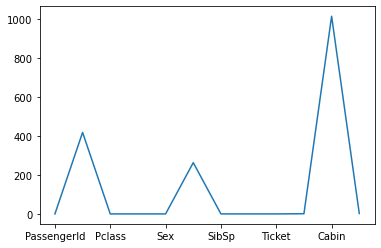

In [13]:
df.isna().sum().plot.line()

<AxesSubplot:>

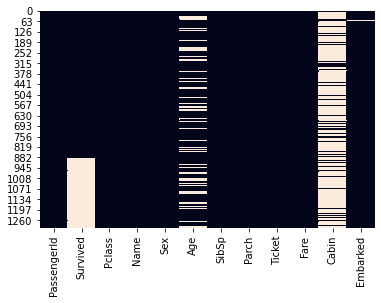

In [15]:
sns.heatmap(df.isnull(), cbar=False)

3. Number of unique values

In [16]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

4. Survived

In [17]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<AxesSubplot:>

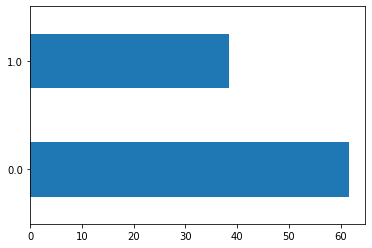

In [18]:
(df.Survived.value_counts(normalize=True) * 100).plot.barh()

5. Pclass

<AxesSubplot:ylabel='Pclass'>

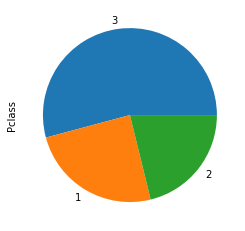

In [19]:
name_dynamics = df['Pclass'].value_counts()
name_dynamics.plot(kind='pie', y='Count')

In [29]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:>

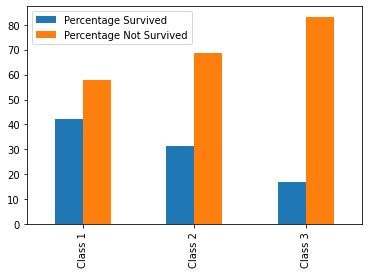

In [24]:
pclass_1 = round((df[df.Pclass == 1].Survived == 1).value_counts()[1]/len(df[df.Pclass == 1]) * 100, 2)
pclass_2 = round((df[df.Pclass == 2].Survived == 1).value_counts()[1]/len(df[df.Pclass == 2]) * 100, 2)
pclass_3= round((df[df.Pclass == 3].Survived == 1).value_counts()[1]/len(df[df.Pclass == 3]) * 100, 2)
pclass = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1,"Class 2": pclass_2, "Class 3": pclass_3},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1,"Class 2": 100-pclass_2, "Class 3": 100-pclass_3}})
pclass.plot.bar()

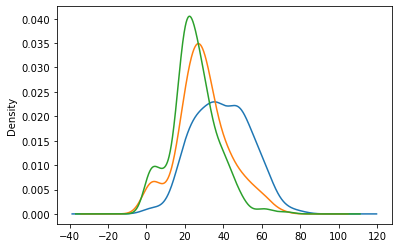

In [27]:
for value in [1,2,3]:
    df.Age[df.Pclass == value].plot(kind="kde")

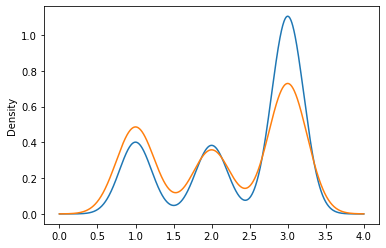

In [28]:
for value in ["male","female"]:
    df.Pclass[df.Sex == value].plot(kind="kde")

In [30]:
print(pclass)

         Percentage Survived  Percentage Not Survived
Class 1                42.11                    57.89
Class 2                31.41                    68.59
Class 3                16.78                    83.22


6. Sex

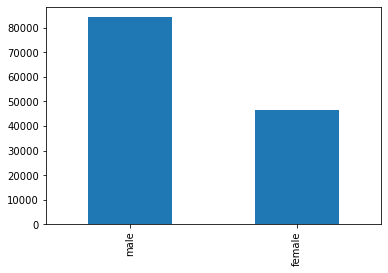

In [33]:
sex = (df.Sex.value_counts() * 100).plot.bar()

<AxesSubplot:>

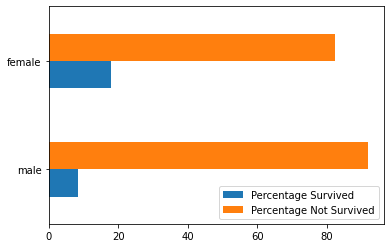

In [37]:
male = round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
female = round((df[df.Sex == 'female'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
sex1 = pd.DataFrame(
    { "Percentage Survived":{"male": male,"female": female},  "Percentage Not Survived":{"male": 100-male,"female": 100-female}})
sex1.plot.barh()

7. Age

In [39]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age_Range', ylabel='count'>

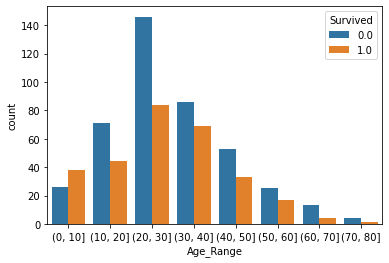

In [45]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = df)

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

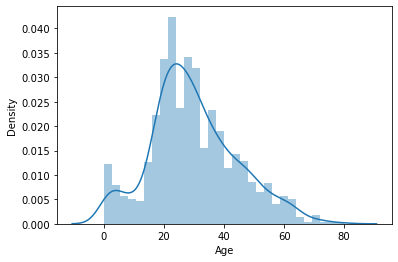

In [46]:
sns.distplot(df['Age'].dropna(),bins=30)


8. SibSp

In [47]:
df.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

<AxesSubplot:>

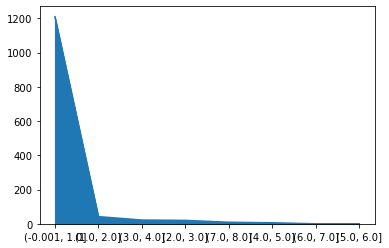

In [50]:
sib = pd.DataFrame()
sib['survived'] = df.Survived
sib['sibling_spouse'] = pd.cut(df.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)
(sib.sibling_spouse.value_counts()).plot.area()

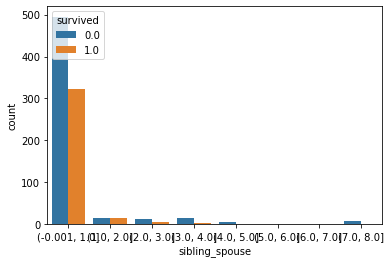

In [51]:
x = sns.countplot(x = "sibling_spouse", hue = "survived", data = sib)

9. Parch

In [53]:
df.Parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

Text(0.5, 1.0, 'Training Data - Number of parents/children and survival density')

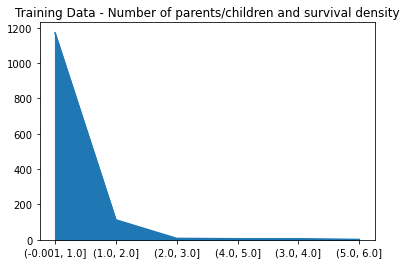

In [55]:
p = pd.DataFrame()
p['survived'] = df.Survived
p['parents_children'] = pd.cut(df.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)
(p.parents_children.value_counts()).plot.area().set_title("Training Data - Number of parents/children and survival density")

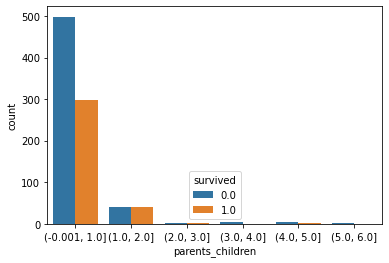

In [56]:
x = sns.countplot(x = "parents_children", hue = "survived", data = p)

10. Ticket - не предоставляет дополнительной информации

11. Fare

In [58]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [60]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120])

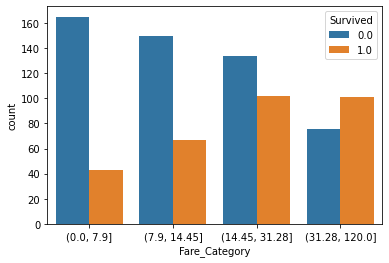

In [61]:
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = df)

12. Cabin - пропущено слишком много значений

13. Embarked

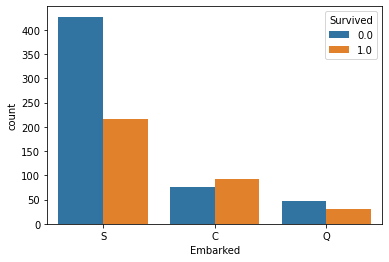

In [62]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = df)

NB Accuracy: 65.92%
The cross validated score for GNB is: 65.45


<AxesSubplot:>

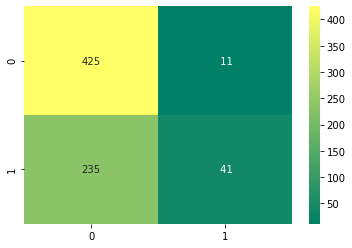

In [78]:
x_pred = df[df.Survived.isnull()]
x_pred = x_pred.drop(['Survived'], axis = 1)

train_data = df
train_data = train_data.dropna()
feature_train = train_data['Survived']
train_data.shape

clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for GNB is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")